In [524]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import seaborn as sns
import statistics
import plotly.express as px
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tacoma']
#can use data = Counter(...) then data.most_common //for most used items
philly_data = pd.read_csv('all.csv')
zip_code = philly_data['zip']
attorney = philly_data['attorney']
offenses = philly_data['offenses']
offense_date = philly_data['offense_date']
age = philly_data['dob']
age.dropna()
arrest_dt = philly_data['arrest_dt']
case_stat = philly_data['case_status']
bail_amt = philly_data['bail_amount']
bail_amt.dropna()
bail_type = philly_data['bail_type']
bail_paid = philly_data['bail_paid']
bail_dt = philly_data['bail_date']
prelim_date = philly_data['prelim_hearing_dt']
prelim_time = philly_data['prelim_hearing_time']

#philly_data['zip'].describe gets things like count, mean ...



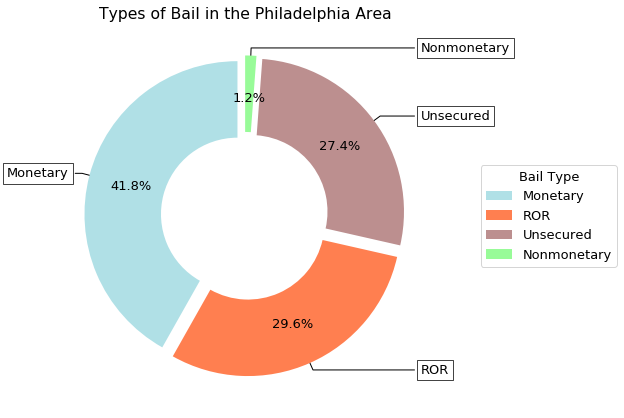

In [445]:
#pie chart for bail type, 
type_size = []
types = []
explode = (0.05, 0.05,0.05,0.05)
colors = ['powderblue', 'coral', 'rosybrown', 'palegreen']
bail_type_count = Counter(bail_type)
for bail_tup in bail_type_count.most_common():
    if bail_tup[0] != 'Nominal' and type(bail_tup[0]) != float:
        types.append(bail_tup[0])
        type_size.append(bail_tup[1])


fig1, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(type_size,explode = explode,colors = colors,autopct = '%1.1f%%', pctdistance = .72,radius = 1,
                                  wedgeprops=dict(width=0.5), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.73)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(types[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)


    
    
ax.legend(types,
          title="Bail Type",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

plt.title("Types of Bail in the Philadelphia Area")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Amount Issued during the Day')

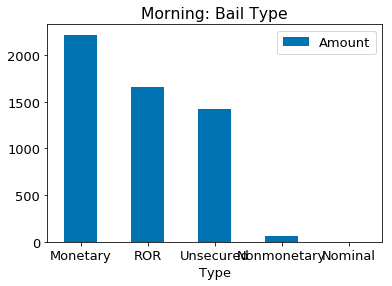

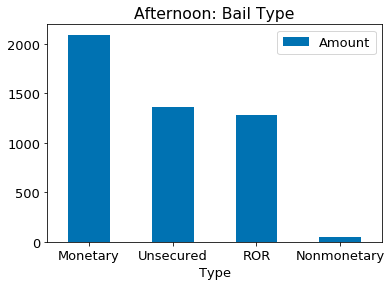

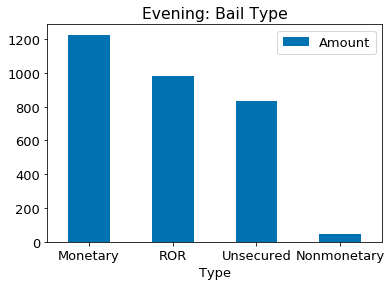

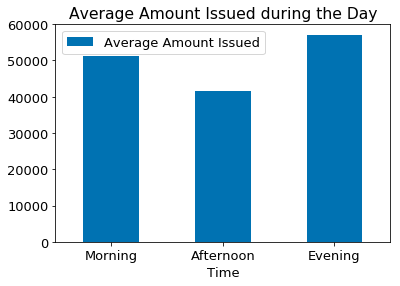

In [527]:
morning_type =[]
afternoon_type = []
evening_type = []
morning_amt =[]
evening_amt =[]
afternoon_amt= []
i = 0
for time in prelim_time:
    parse_time_m = time.split()
    parse_time_c = time.split(':')
    if type(bail_type[i]) == str:
        if parse_time_m[1] == 'AM':
            if int(parse_time_c[0]) >3:
                morning_type.append(bail_type[i])
                morning_amt.append(bail_amt[i])
            else:
                evening_type.append(bail_type[i])
                evening_amt.append(bail_amt[i])
        else:
            if int(parse_time_c[0]) < 6:
                afternoon_type.append(bail_type[i])
                afternoon_amt.append(bail_amt[i])
            else:
                evening_type.append(bail_type[i])
                evening_amt.append(bail_amt[i])
    i += 1
    

morning_tct = Counter(morning_type).most_common()
value_morn = []
type_morning = []
for i in morning_tct:
    type_morning.append(i[0])
    value_morn.append(i[1])
    
df = pd.DataFrame({'Type':type_morning, 'Amount':value_morn})
ax = df.plot.bar(x='Type', y='Amount', rot=0)
plt.title("Morning: Bail Type")  
    
evening_tct = Counter(evening_type).most_common()
value_morn = []
type_morning = []
for i in evening_tct:
    type_morning.append(i[0])
    value_morn.append(i[1])
    
df = pd.DataFrame({'Type':type_morning, 'Amount':value_morn})
ax = df.plot.bar(x='Type', y='Amount', rot=0)
plt.title("Afternoon: Bail Type")

afternoon_tct = Counter(afternoon_type).most_common()
value_morn = []
type_morning = []
for i in afternoon_tct:
    type_morning.append(i[0])
    value_morn.append(i[1])
    
df = pd.DataFrame({'Type':type_morning, 'Amount':value_morn})
ax = df.plot.bar(x='Type', y='Amount', rot=0)
plt.title("Evening: Bail Type")


time = ['Morning', 'Afternoon','Evening']
avg_amount = [statistics.mean(morning_amt), statistics.mean(afternoon_amt), statistics.mean(evening_amt)]
df = pd.DataFrame({'Time':time, 'Average Amount Issued':avg_amount})
ax = df.plot.bar(x='Time', y='Average Amount Issued', rot=0)
plt.title("Average Amount Issued during the Day")


#prelim_datetime = []
#i = 0
#for time in prelim_time:
    #prelim_datetime.append(prelim_date[i] + " "+ time)
    #i += 1
    
#df = pd.DataFrame({'prelim_datetime': prelim_datetime,  
                #'bail_amt': bail_amt})


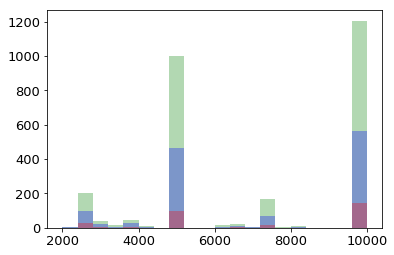

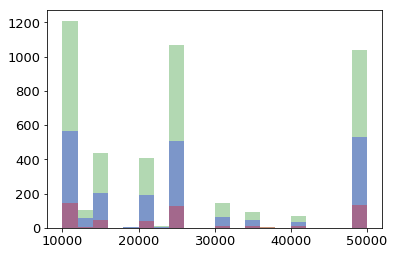

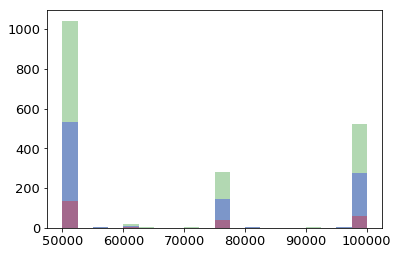

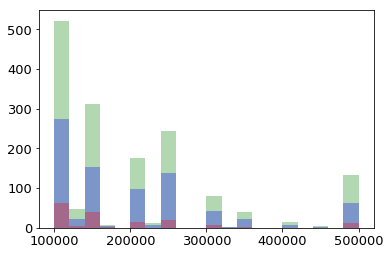

In [504]:

def calculateAge(birthDate): 
    days_in_year = 365.2425    
    age = int((datetime.date.today() - birthDate).days / days_in_year)
    if age < 0:
        age = age + 100
    return age  
  
age_int = []
amt_ = []
i = 0
for birth in age:
    if type(birth) != float:   
        date_time = datetime.datetime.strptime(birth, '%m/%d/%y').date()
        num_age = calculateAge(date_time)
        age_int.append(num_age)
        amt_.append(bail_amt[i])
        i += 1
        
under_30 = []
under_50 = []
over_50 = []
j = 0
for i in age_int:
    if i < 30:
        under_30.append(amt_[j])
    if i > 50:
        over_50.append(amt_[j])
    else:
        under_50.append(amt_[j])
    j = j +1

#low values
plt.hist(under_50, 20,alpha =0.3, color = 'g',range = (2000,10000))
plt.hist(under_30,20, alpha =0.3, color = 'b',range = (2000, 10000))
plt.hist(over_50, 20,alpha =0.3, color = 'r',range =(2000,10000))
plt.show()
#low_mid
plt.hist(under_50, 20,alpha =0.3, color = 'g',range = (10000, 50000))
plt.hist(under_30,20, alpha =0.3, color = 'b',range = (10000, 50000))
plt.hist(over_50, 20,alpha =0.3, color = 'r',range =(10000,50000))
plt.show()
#mid
plt.hist(under_50, 20,alpha =0.3, color = 'g',range = (50000,100000))
plt.hist(under_30,20, alpha =0.3, color = 'b',range = (50000, 100000))
plt.hist(over_50, 20,alpha =0.3, color = 'r',range =(50000,100000))
plt.show()
#high
plt.hist(under_50, 20,alpha =0.3, color = 'g',range = (100000, 500000))
plt.hist(under_30,20, alpha =0.3, color = 'b',range = (100000, 500000))
plt.hist(over_50, 20,alpha =0.3, color = 'r',range =(100000, 500000))
plt.show()